Plot distance and elevation metadata by AWS site
===

Import required modules
---

In [1]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}

from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2
from model import Model
from GCNet import GCNet

AWS metadata
---

In [2]:
A = GCNet("site_info.nc")
A.loadMeta()
nSites = A.getNSites()

siteNames = []
for awsIX in ( range( nSites ) ):
    siteNames.append( A.getName( awsIX ) )

Distance and elevation metadata
---

In [3]:
metaFN = 'dist_elev_meta_erai.nc'
metaFile = Dataset( metaFN, 'r' )
closestDist = metaFile.variables['distanceClosest']
closestBias = metaFile.variables['elevationBiasClosest']
interpBias = metaFile.variables['elevationBiasInterp']

Plot data
----

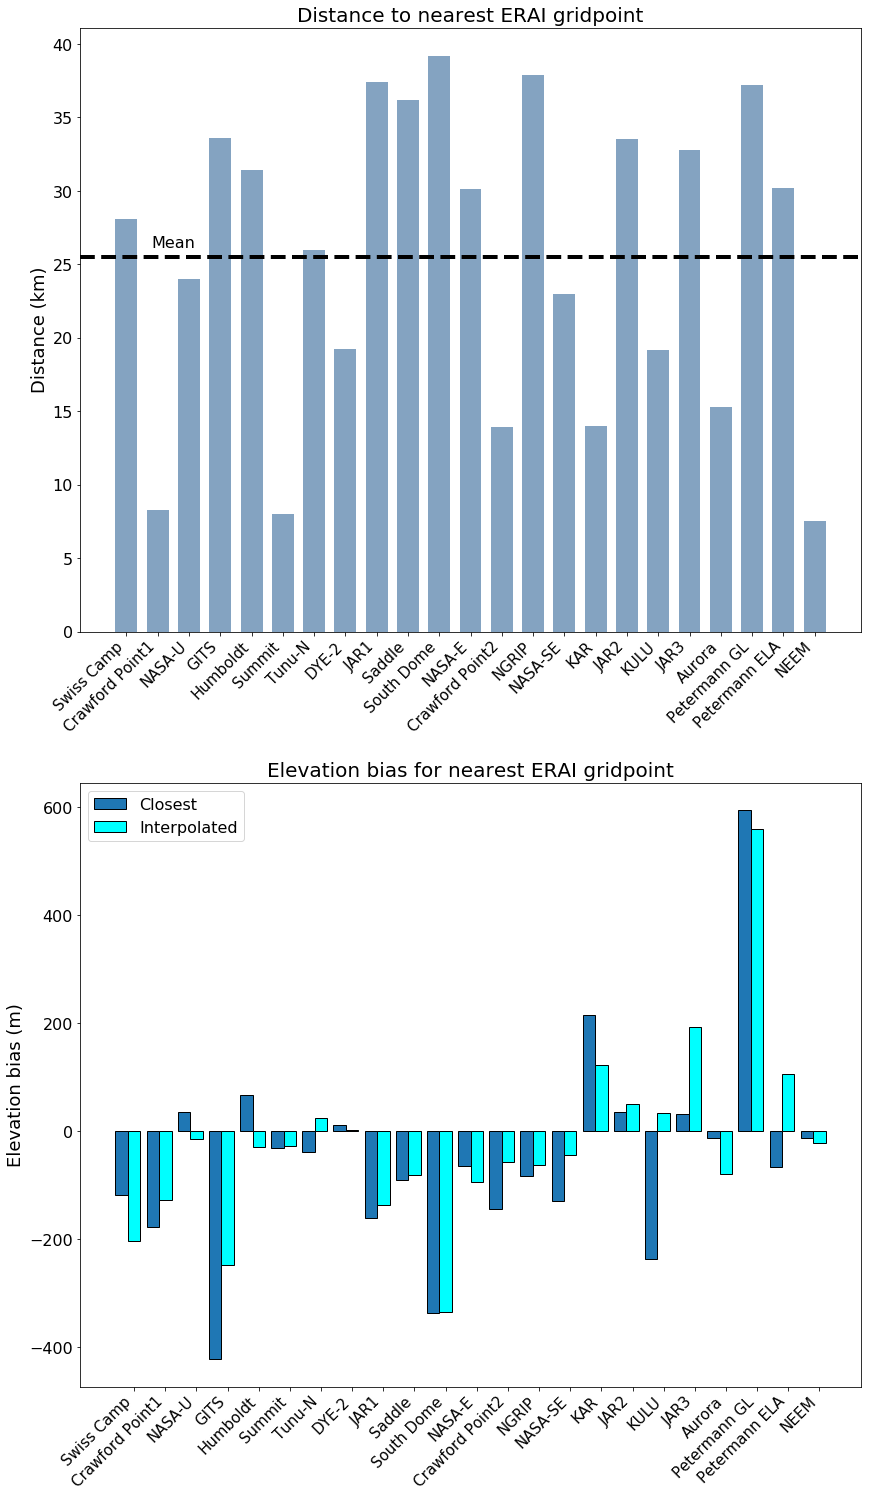

In [4]:
barWidth = 0.7
fig = plt.figure( figsize=(14,25) )
fig.subplots_adjust(hspace=.25)

xpos1 = np.arange( 1, nSites+1 )

ax = plt.subplot( 211 )
plt.title( 'Distance to nearest ERAI gridpoint',fontsize=20 )
plt.ylabel( 'Distance (km)',fontsize=18 )
plt.bar( xpos1, closestDist, width=barWidth, color=(0.2, 0.4, 0.6, 0.6) )
plt.xticks( xpos1, siteNames, rotation=45, horizontalalignment='right', fontsize=15 )
plt.yticks( fontsize=16 );
avg = np.mean( closestDist )
plt.axhline( avg, linestyle='dashed', color='black', linewidth=4 );
plt.text(2.5, avg+1, 'Mean', fontsize=16, va='center', ha='center', backgroundcolor='w');

barWidth = 0.4
xpos2 = [x + barWidth for x in xpos1]
ax = plt.subplot( 212 )
plt.title( 'Elevation bias for nearest ERAI gridpoint',fontsize=20 )
plt.ylabel( 'Elevation bias (m)',fontsize=18 )
plt.bar( xpos1, closestBias, width=barWidth, label='Closest',  edgecolor='black' )
plt.bar( xpos2, interpBias, width=barWidth, label='Interpolated', color='cyan',  edgecolor='black' )
plt.xticks( xpos2, siteNames, rotation=45, horizontalalignment='right', fontsize=15 )
plt.yticks( fontsize=16 );
plt.legend( loc='upper left', prop={'size': 16});
# avg = np.mean( closestBias )
# plt.axhline( avg, linestyle='dashed', color='black', linewidth=4 );


In [5]:
# plot figure to a file
fmt = 'eps'
ofn = 'erai_dist_elev_meta.'+fmt
fig.savefig(ofn, format=fmt);